In [1]:
import pandas as pd
import numpy as np
import pickle

import altair as alt
from functools import reduce
from sklearn.cluster import KMeans

#importing local libraries for drawings (because they clutter)
#   They should still be available within the git repo but it's pretty much template stuff from altair
import sys
sys.path.append('../')
from lib.builders import locators,names,towns,nations,culture as c
import lib.drawMaps as draw

with (open('world_1.p', 'rb')) as pickle_file:
    world = pickle.load(pickle_file)
    
world

In [2]:
culture = c.Culture()
culture.eons

10

# The age of the ancients

the terrain and all of the natural features are formed in the first age. Mountains, rivers, lakes, forrests. Once the land has settle, the first cities appear. 

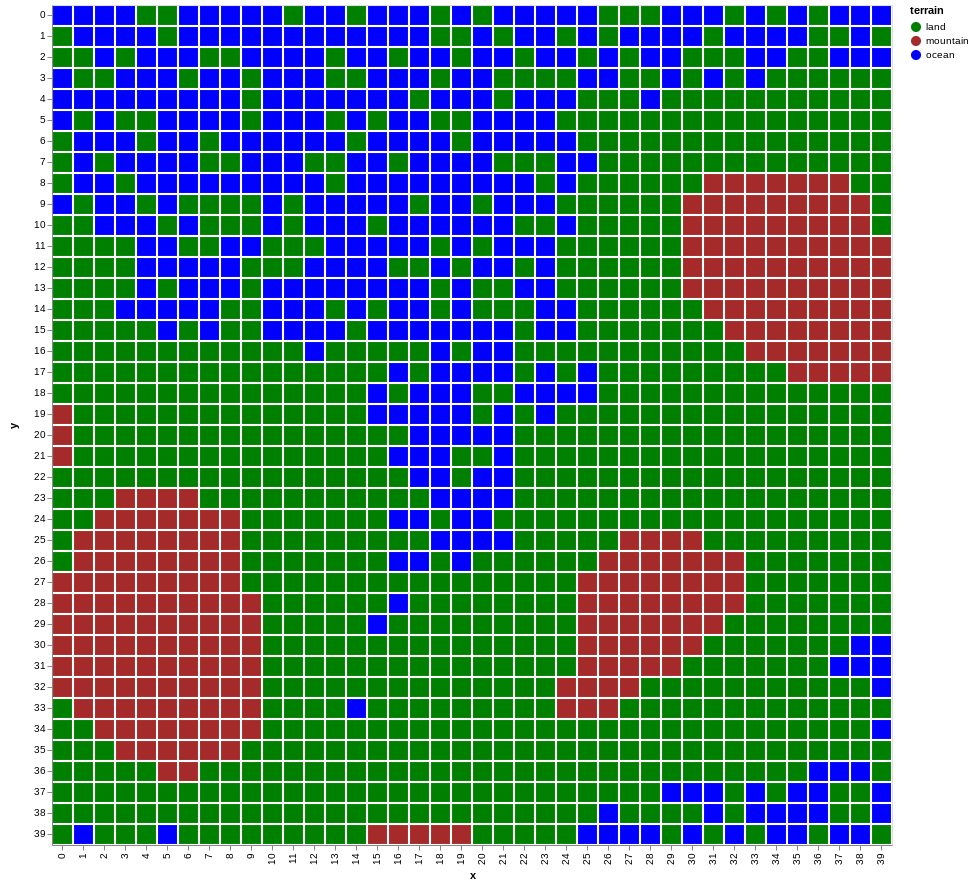

In [3]:
draw.drawTerrainTypes(world.grid_elevation,world.landscape)

the `__init__` method of a city takes a founding age and a location (which can be generated randomly via `World.get_random_chord`). The init method automatically generates a name. The default nation is the name of the town.

In [4]:
new_town = towns.Town(world.get_random_chord(),1,names)
new_town

town of Earthcraft: population: 1 location: [21,6] founded 1

## The age of civilization

Cities grow for a set number of aeons. During each eon
* n new villages are born
* each village has g% chance to grow

at the end of this age cities merge together to become nations. 

In [5]:
all_towns = towns.build_towns(world,culture,names)
all_towns

[town of Artmoral: population: 5 location: [24,34] founded 0,
 town of Solchild: population: 2 location: [12,22] founded 0,
 town of Snakespike: population: 5 location: [27,2] founded 1,
 town of Oakfort: population: 5 location: [4,34] founded 1,
 town of Gleamring: population: 4 location: [5,27] founded 2,
 town of Stonegarden: population: 5 location: [0,27] founded 2,
 town of Founder'smore: population: 2 location: [5,27] founded 2,
 town of Brinemoral: population: 3 location: [17,32] founded 3,
 town of Heartrest: population: 5 location: [20,28] founded 3,
 town of Corehaven: population: 1 location: [11,38] founded 3,
 town of Lilyspike: population: 3 location: [39,9] founded 4,
 town of Snowcrest: population: 5 location: [15,21] founded 4,
 town of Malhost: population: 2 location: [33,31] founded 4,
 town of Buckrun: population: 2 location: [0,38] founded 4,
 town of Splitgarden: population: 2 location: [31,1] founded 5,
 town of Gleamcatch: population: 3 location: [25,19] founded 

In [6]:
towns.get_town(all_towns,'Brinecrawl')

In [7]:
world.df_features.head()

,y,rainfall,x,key,elevation,terrain
key,,,,,,
0:0,0,0.0,0,0:0,0.0,ocean
1:0,0,-1.0,1,1:0,-1.0,ocean
2:0,0,-1.0,2,2:0,-1.0,ocean
3:0,0,0.0,3,3:0,-1.0,ocean
4:0,0,3.0,4,4:0,1.0,land


In [ ]:
world.add_features(all_towns)

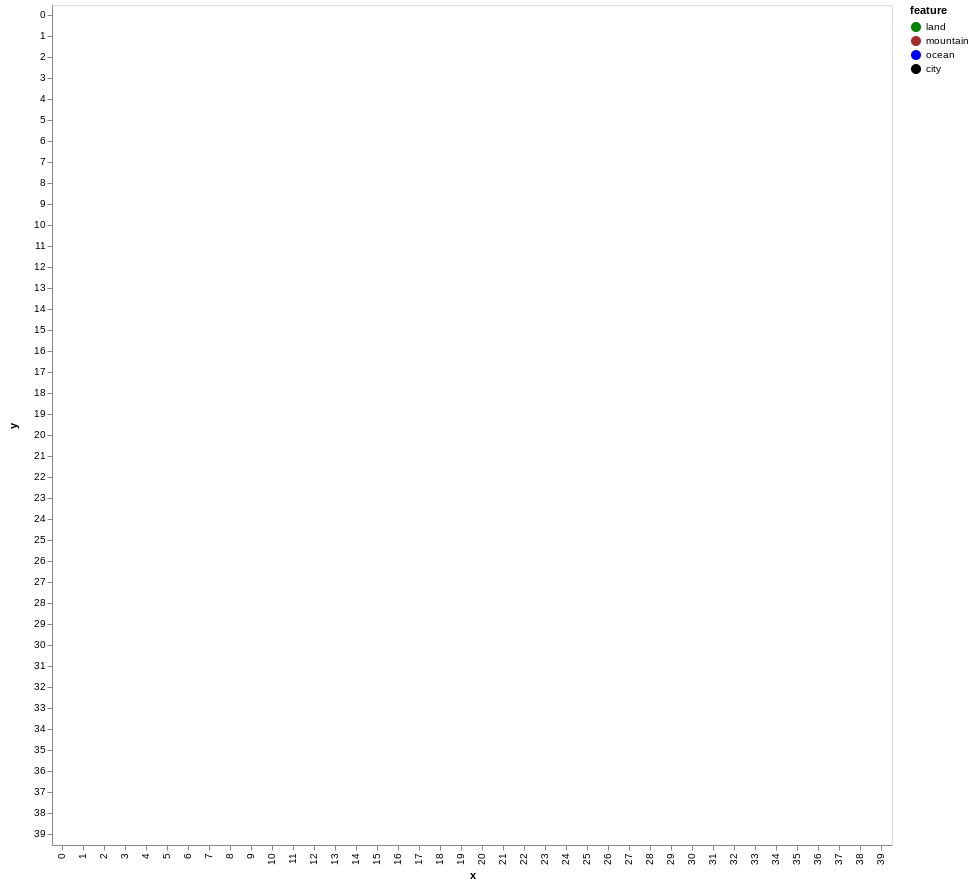

In [8]:
draw.drawCities(world.df_features)

In [10]:
world.df_features[world.df_features['feature'].isna()==False]

,y,rainfall,x,key,elevation,terrain,feature
key,,,,,,,
32:0,0,18.0,32,32:0,1.0,land,Lord'sgarden
31:1,1,15.0,31,31:1,3.0,land,Splitgarden
27:2,2,19.0,27,27:2,1.0,land,Snakespike
35:5,5,7.0,35,35:5,6.0,land,Tearbrook
39:9,9,22.0,39,39:9,22.0,land,Lilyspike
39:11,11,29.0,39,39:11,28.0,mountain,Lord'slair
38:12,12,49.0,38,38:12,45.0,mountain,Godblaze
9:14,14,10.0,9,9:14,1.0,land,Snowkeep
0:17,17,18.0,0,0:17,18.0,land,Doomcatch


In [ ]:
cities = df[df['feature']=='city']
k_means = KMeans(init='k-means++', n_clusters=landscape['n nations'], n_init=10)
k_means.fit(cities[['x','y']])

In [ ]:
landscape['nations'] = build.labelNations(k_means.labels_)
landscape['nations']

In [ ]:
df.loc[df['feature']=='city','nation number'] = k_means.labels_
df['nation'] = df['nation number'].apply(lambda x: build.assignNation(x,landscape=landscape))

for t in towns:
    try:
        t.diplomacy['nation'] = df.loc[df['town']==t.name,'nation'].values[0]
        t.diplomacy['fealty'] = 1
    except:
        continue
    
df[df['feature']=='city'].sort_values(['nation'])

In [ ]:
predicted_nations = k_means.predict(df.loc[(df['feature']!='ocean')& \
                                           (df['feature']!='city')]
                                    [['x','y']]
                                   )
df.loc[(df['feature']!='ocean')& \
       (df['feature']!='city'),'nation number'] = predicted_nations

df['nation'] = df['nation number'].apply(lambda x: build.assignNation(x,landscape))

draw.drawboarders(df)

In [ ]:
#for each nation (n), appoint the most populus city (c) as it's capitol.
for n in np.unique(df['nation'].dropna()):
    c = df[(df['nation']==n)& \
          (df['feature']=='city')]['town'].tolist()
    #getting the town objects
    ts = [t for t in towns if t.name in c]
    #get population(p)
    p = [t.pop for t in ts]
    #getting the first town that has the max population, make that the capitol
    ts[np.argmax(p)].type='capitol'
    
towns

In [ ]:
world = {"landscape":landscape,
        "df":df,
        'towns':towns}

with open('world_1.p', 'wb') as pickle_file:
    pickle.dump(world, pickle_file)